# CPU Price Projections

# Importing Libraries

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix

parts_analysis = ["#046d8b", "#0190ba", "#004b60", "#e0576a", "#b42a3d", "#9a303e"]

# Pre-Processing the Data

In [60]:
df = pd.read_csv('PC_Part_Picker_Datasets\CPU_df_updated.csv')
#drop GHz from Performance Core Clock and Boost Clock
df['Performance Core Clock'] = df['Performance Core Clock'].str.replace(' GHz', '')
df['Boost Clock'] = df['Boost Clock'].str.replace(' GHz', '')
#change Performance Core Clock and Boost Clock to float
df['Performance Core Clock'] = df['Performance Core Clock'].astype(float)
df['Boost Clock'] = df['Boost Clock'].astype(float)
#remove the spaces from the column names
df.columns = df.columns.str.replace(' ', '_')
#remove W from TDP Column
df['TDP'] = df['TDP'].str.replace(' W', '')
# For Brand Column change AMD to 1 and Intel to 0
df['Brand'] = df['Brand'].replace('AMD', 1)
df['Brand'] = df['Brand'].replace('Intel', 0)
# For Integrated_Graphics replace empty values with 0
df['Integrated_Graphics'] = df['Integrated_Graphics'].fillna(0)
# For Integrated Graphics change each unique value to a number
df['Integrated_Graphics'] = df['Integrated_Graphics'].replace('Radeon', 1)
df['Integrated_Graphics'] = df['Integrated_Graphics'].replace('Intel UHD Graphics 770', 2)
df['Integrated_Graphics'] = df['Integrated_Graphics'].replace('Radeon Vega 7', 3)
df['Integrated_Graphics'] = df['Integrated_Graphics'].replace('Radeon Vega 8', 4)
df['Integrated_Graphics'] = df['Integrated_Graphics'].replace('Radeon 740M', 5)
df['Integrated_Graphics'] = df['Integrated_Graphics'].replace('Radeon 780M', 6)
df['Integrated_Graphics'] = df['Integrated_Graphics'].replace('Radeon 760M', 7)
df['Integrated_Graphics'] = df['Integrated_Graphics'].replace('Intel UHD Graphics 730', 8)
df['Integrated_Graphics'] = df['Integrated_Graphics'].replace('Intel UHD Graphics 630', 9)
df['Integrated_Graphics'] = df['Integrated_Graphics'].replace('Intel HD Graphics 630', 10)
df['Integrated_Graphics'] = df['Integrated_Graphics'].replace('Intel UHD Graphics 750', 11)
df['Integrated_Graphics'] = df['Integrated_Graphics'].replace('Radeon Vega 11', 12)

# For Socket_Type change each unique value to a number
df['Socket_Type'] = df['Socket_Type'].replace('AM5', 1)
df['Socket_Type'] = df['Socket_Type'].replace('AM4', 2)
df['Socket_Type'] = df['Socket_Type'].replace('LGA 1700', 3)
df['Socket_Type'] = df['Socket_Type'].replace('LGA 1200', 4)
df['Socket_Type'] = df['Socket_Type'].replace('LGA 1151', 5)

# For Sockets_Supported change each unique value to a number
df['Sockets_Supported'] = df['Sockets_Supported'].replace('Yes', 1)
df['Sockets_Supported'] = df['Sockets_Supported'].replace('No', 0)

df.head()

,Brand,Model,Core_Count,Performance_Core_Clock,Boost_Clock,TDP,Integrated_Graphics,Sockets_Supported,Rating,Rating_Count,Price,Socket_Type,Release_Year
0,1,Ryzen 3 1200,4,3.1,3.4,65,0,0,5,69,105.0,2,2017
1,1,Ryzen 3 1200,4,3.1,3.4,65,0,0,5,4,105.0,2,2017
2,1,Ryzen 5 1400,4,3.2,3.4,65,0,1,5,52,110.0,2,2017
3,1,Ryzen 5 1500X,4,3.5,3.7,65,0,1,5,50,195.0,2,2017
4,1,Ryzen 5 1600,6,3.2,3.6,65,0,1,5,55,120.0,2,2017


# Creating CPU Quality Column Based of Year of Release

In [61]:
#find the unique values in the Release Year column
df['Release_Year'].unique()

array([2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024], dtype=int64)

In [62]:
#Create a new dataframe for each year
df_2023 = df[df['Release_Year'] == 2023]
df_2022 = df[df['Release_Year'] == 2022]
df_2021 = df[df['Release_Year'] == 2021]
df_2020 = df[df['Release_Year'] == 2020]
df_2019 = df[df['Release_Year'] == 2019]
df_2018 = df[df['Release_Year'] == 2018]
df_2017 = df[df['Release_Year'] == 2017]
df_2016 = df[df['Release_Year'] == 2016]

In [63]:
# Calculating the quantiles for the Boost Clock column
print(df_2023['Boost_Clock'].quantile([0, .20, .4, .8, 1]))
print(df_2022['Boost_Clock'].quantile([0, .20, .4, .8, 1]))
print(df_2021['Boost_Clock'].quantile([0, .20, .4, .8, 1]))
print(df_2020['Boost_Clock'].quantile([0, .20, .4, .8, 1]))
print(df_2019['Boost_Clock'].quantile([0, .20, .4, .8, 1]))
print(df_2018['Boost_Clock'].quantile([0, .20, .4, .8, 1]))
print(df_2017['Boost_Clock'].quantile([0, .20, .4, .8, 1]))
print(df_2016['Boost_Clock'].quantile([0, .20, .4, .8, 1]))



0.0    4.50
0.2    4.84
0.4    5.24
0.8    5.60
1.0    6.00
Name: Boost_Clock, dtype: float64
0.0    4.00
0.2    4.40
0.4    4.68
0.8    5.40
1.0    5.80
Name: Boost_Clock, dtype: float64
0.0    4.40
0.2    4.64
0.4    4.90
0.8    5.20
1.0    5.30
Name: Boost_Clock, dtype: float64
0.0    4.20
0.2    4.40
0.4    4.64
0.8    5.10
1.0    5.30
Name: Boost_Clock, dtype: float64
0.0    4.00
0.2    4.20
0.4    4.58
0.8    4.90
1.0    5.00
Name: Boost_Clock, dtype: float64
0.0    3.3
0.2    4.0
0.4    4.1
0.8    4.6
1.0    5.0
Name: Boost_Clock, dtype: float64
0.0    3.0
0.2    3.5
0.4    3.8
0.8    4.4
1.0    4.5
Name: Boost_Clock, dtype: float64
0.0   NaN
0.2   NaN
0.4   NaN
0.8   NaN
1.0   NaN
Name: Boost_Clock, dtype: float64


In [64]:
#Create a new column called 'CPU_Release_Performance' based on the quantiles of the Boost Clock column
df_2023['CPU_Release_Performance'] = pd.cut(df_2023['Boost_Clock'], bins = [0, 4.3, 4.7, 5.12, 5.76, 6.0], labels = [0, 1, 2, 3, 4])
df_2022['CPU_Release_Performance'] = pd.cut(df_2022['Boost_Clock'], bins = [0, 4.5, 5.0, 5.2, 5.6, 6.0], labels = [0, 1, 2, 3, 4])
df_2021['CPU_Release_Performance'] = pd.cut(df_2021['Boost_Clock'], bins = [0,4.1, 4.4, 4.6, 5.0, 5.5], labels = [0, 1, 2, 3, 4])
df_2020['CPU_Release_Performance'] = pd.cut(df_2020['Boost_Clock'], bins = [0, 4.0, 4.4, 4.84, 5.16, 5.3], labels = [0, 1, 2, 3, 4])
df_2019['CPU_Release_Performance'] = pd.cut(df_2019['Boost_Clock'], bins = [0, 4.0, 4.3, 4.5, 5.1, 5.3], labels = [0, 1, 2, 3, 4])
df_2018['CPU_Release_Performance'] = pd.cut(df_2018['Boost_Clock'], bins = [0, 3.7, 4.16, 4.44, 4.94, 5.0], labels = [0, 1, 2, 3, 4])
df_2017['CPU_Release_Performance'] = pd.cut(df_2017['Boost_Clock'], bins = [0, 3.3, 3.64, 4.0, 4.48, 5.0], labels = [0, 1, 2, 3, 4])
df_2016['CPU_Release_Performance'] = pd.cut(df_2016['Boost_Clock'], bins = [0, 3.3, 3.64, 4.0, 4.48, 5.0], labels = [0, 1, 2, 3, 4])
# Combining the DataFrames
df_combined = pd.concat([df_2023, df_2022, df_2021, df_2020, df_2019, df_2018, df_2017, df_2016])
df_combined.head()

df_combined.head()

#reorder the data frame by index
df_combined = df_combined.reset_index(drop = True)

#save the DataFrame in the PC_Part_Picker_Datasets folder
df_combined.to_csv('PC_Part_Picker_Datasets\CPU_Release_Performance.csv', index = False)


C:\Users\ryhen\AppData\Local\Temp\ipykernel_13440\2285381548.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2023['CPU_Release_Performance'] = pd.cut(df_2023['Boost_Clock'], bins = [0, 4.3, 4.7, 5.12, 5.76, 6.0], labels = [0, 1, 2, 3, 4])
C:\Users\ryhen\AppData\Local\Temp\ipykernel_13440\2285381548.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2022['CPU_Release_Performance'] = pd.cut(df_2022['Boost_Clock'], bins = [0, 4.5, 5.0, 5.2, 5.6, 6.0], labels = [0, 1, 2, 3, 4])
C:\Users\ryhen\AppData

# Splitting into a training and testing data set

In [65]:
#Creating the Response and Feature Variables
X = df_combined[['Brand','Boost_Clock', 'Performance_Core_Clock','CPU_Release_Performance']]
y = df_combined['Release_Year']

#Splitting the Data into Training and Testing Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 26)

#put the x_train and y_train into a DataFrame
df_train = pd.DataFrame(X_train, columns = ['Brand','Boost_Clock', 'Performance_Core_Clock', 'CPU_Release_Performance'])
df_train['Release_Year'] = y_train

#put the x_test and y_test into a DataFrame
df_test = pd.DataFrame(X_test, columns = ['Brand','Boost_Clock', 'Performance_Core_Clock', 'CPU_Release_Performance'])
df_test['Release_Year'] = y_test



# Creating a Generalized Additive Model

In [74]:
# Create a GAM model
gam = smf.glm('Release_Year ~ Brand + Boost_Clock + Performance_Core_Clock + CPU_Release_Performance', data = df_train, family = sm.families.Gaussian()).fit()
# Print out the summary of the model
print(gam.summary())

# test the model on the test data
y_pred = gam.predict(X_test[['Brand','Boost_Clock', 'Performance_Core_Clock', 'CPU_Release_Performance']])
y_pred = np.round(y_pred)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate a classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

#Confusion matrix
print('Confusion Matrix: ')
print(confusion_matrix(y_test, y_pred))

                 Generalized Linear Model Regression Results                  
Dep. Variable:           Release_Year   No. Observations:                  156
Model:                            GLM   Df Residuals:                      148
Model Family:                Gaussian   Df Model:                            7
Link Function:               Identity   Scale:                         0.60713
Method:                          IRLS   Log-Likelihood:                -178.33
Date:                Fri, 19 Apr 2024   Deviance:                       89.855
Time:                        17:07:54   Pearson chi2:                     89.9
No. Iterations:                     3   Pseudo R-squ. (CS):             0.9962
Covariance Type:            nonrobust                                         
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

C:\Users\ryhen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ryhen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ryhen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: Unde

# Accuracy seems low, Checking the Actual vs Predicted Values

In [75]:
#Create a new DataFrame with the actual values, predicted values, and the difference between the actual and predicted values
df_results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'Difference': y_test - y_pred})
df_results.head()


,Actual,Predicted,Difference
66,2021,2020.0,1.0
135,2019,2020.0,-1.0
30,2022,2022.0,0.0
25,2022,2022.0,0.0
162,2017,2017.0,0.0


# Since all the years predicted were max 1 year apart, rechicking accuracy but gives the model a buffer of 1 year on either end

In [76]:
#recheck the accuracy of the model the acceptable range of acceptable values is -1, 0, 1
accuracy = len(df_results[df_results['Difference'].isin([-1, 0, 1])]) / len(df_results)
print("Accuracy:", accuracy)

Accuracy: 1.0


# Using the Model to Predict the Year a CPU will come out given the Brand of the CPU, targeted Boost Clock and Performance Core Clock Speeds, and the CPU Release Performance

In [81]:
# Predicting the Year an AMD CPU will be released with the following features Brand: AMD, Boost Clock: 8, Performance Core Clock: 6, CPU Release Performance: Medium
X_new = pd.DataFrame({'Brand': [0],'Boost_Clock': [10], 'Performance_Core_Clock': [8], 'CPU_Release_Performance': [2]})
X_new = sm.add_constant(X_new)
y_new = gam.predict(X_new)
y_new = np.round(y_new)
print(y_new)

0    2042.0
dtype: float64


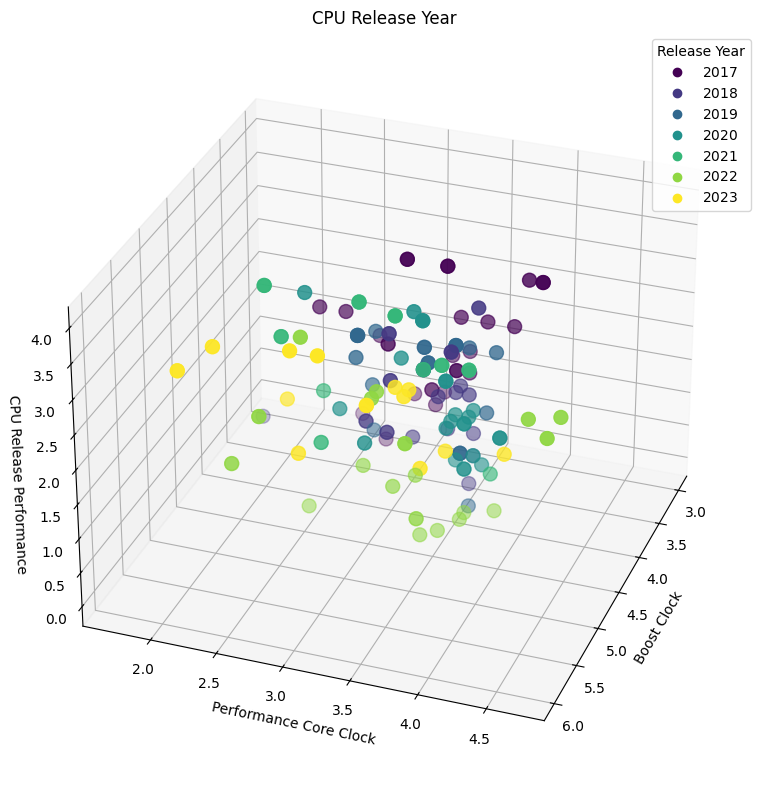

In [70]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df_train['Boost_Clock'], df_train['Performance_Core_Clock'], df_train['CPU_Release_Performance'], c=df_train['Release_Year'], cmap='viridis', s=100)
ax.set_xlabel('Boost Clock')
ax.set_ylabel('Performance Core Clock')
ax.set_zlabel('CPU Release Performance')
ax.set_title('CPU Release Year')
# Creating a legend
legend = ax.legend(*scatter.legend_elements(), title='Release Year')
# Changing the view angle of the plot
ax.view_init(30, 20)
plt.tight_layout()
plt.show()

#save the plot in Visualizations folder
fig.savefig('Visualizations\CPU_Release_Year.png')



In [71]:
df.head()

,Brand,Model,Core_Count,Performance_Core_Clock,Boost_Clock,TDP,Integrated_Graphics,Sockets_Supported,Rating,Rating_Count,Price,Socket_Type,Release_Year
0,1,Ryzen 3 1200,4,3.1,3.4,65,0,0,5,69,105.0,2,2017
1,1,Ryzen 3 1200,4,3.1,3.4,65,0,0,5,4,105.0,2,2017
2,1,Ryzen 5 1400,4,3.2,3.4,65,0,1,5,52,110.0,2,2017
3,1,Ryzen 5 1500X,4,3.5,3.7,65,0,1,5,50,195.0,2,2017
4,1,Ryzen 5 1600,6,3.2,3.6,65,0,1,5,55,120.0,2,2017


In [72]:
# Create a GAM model
gam = smf.glm('Release_Year ~ Brand + Boost_Clock + Performance_Core_Clock', data = df, family = sm.families.Gaussian()).fit()
# Print out the summary of the model
print(gam.summary())

# test the model on the test data
y_pred = gam.predict(X_test[['Brand','Boost_Clock', 'Performance_Core_Clock']])
y_pred = np.round(y_pred)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate a classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

#Confusion matrix
print('Confusion Matrix: ')
print(confusion_matrix(y_test, y_pred))

                 Generalized Linear Model Regression Results                  
Dep. Variable:           Release_Year   No. Observations:                  210
Model:                            GLM   Df Residuals:                      206
Model Family:                Gaussian   Df Model:                            3
Link Function:               Identity   Scale:                          2.2563
Method:                          IRLS   Log-Likelihood:                -381.40
Date:                Fri, 19 Apr 2024   Deviance:                       464.80
Time:                        17:07:43   Pearson chi2:                     465.
No. Iterations:                     3   Pseudo R-squ. (CS):             0.6943
Covariance Type:            nonrobust                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               2010

C:\Users\ryhen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ryhen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ryhen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: Unde

In [73]:
#Create a new DataFrame with the actual values, predicted values, and the difference between the actual and predicted values
df_results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'Difference': y_test - y_pred})
df_results.head()

,Actual,Predicted,Difference
66,2021,2020.0,1.0
135,2019,2018.0,1.0
30,2022,2020.0,2.0
25,2022,2022.0,0.0
162,2017,2019.0,-2.0
